#Iris Flower Machine Learning Visualization (Unbalanced dataset)

### Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Rad data

In [3]:
df = pd.read_csv('IRIS.csv')
print(df)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


#Data Preprocessing

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Describing data

In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.shape

(150, 5)

#checking for the null values in each column


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

##Frequency of each class label

In [8]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## here we are plotting a histogram to check the value counts of each class


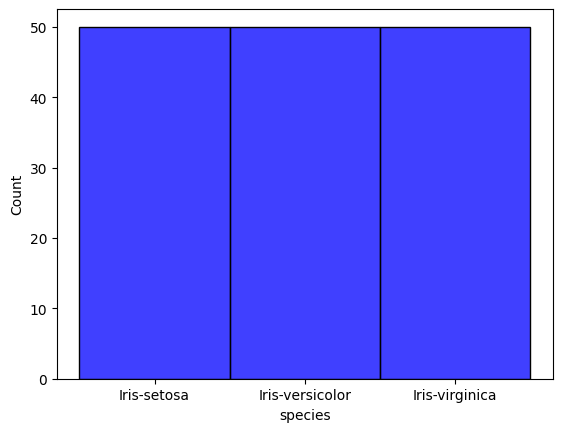

In [9]:
sns.histplot(df['species'],color='b')
plt.show()

<Axes: >

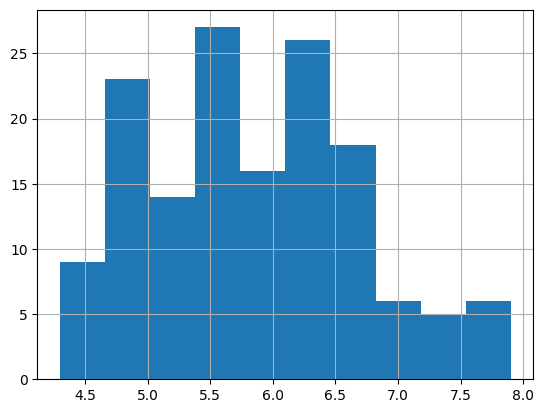

In [10]:
# Histograms
df['sepal_length'].hist()

<Axes: >

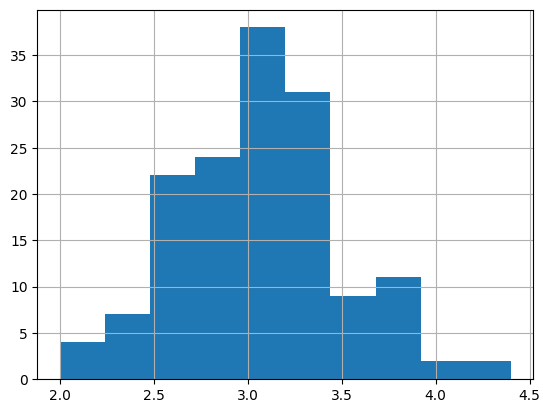

In [11]:
df['sepal_width'].hist()


<Axes: >

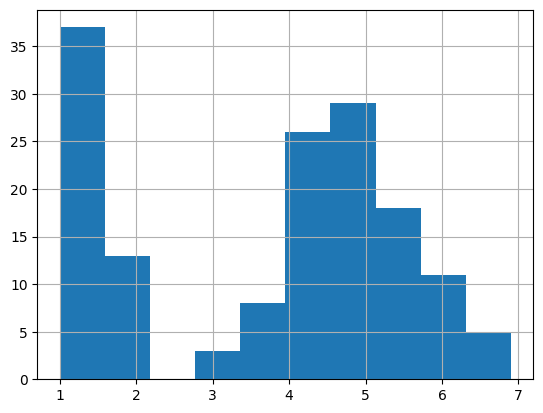

In [12]:
df['petal_length'].hist()


In [13]:
# Scatter plots. Plotting a scatter plot for each specie of flower
# define the colours to differentiate each specie
colour = ['black', 'purple', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

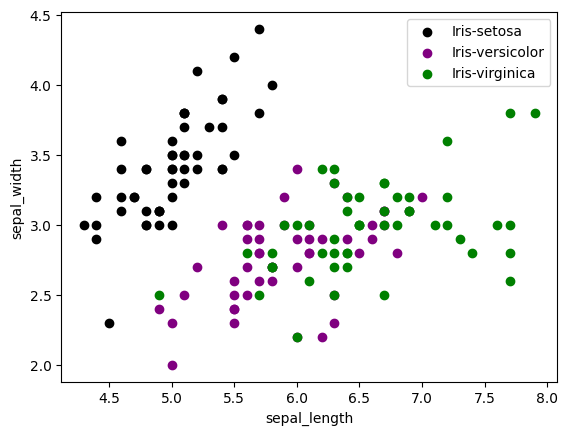

In [14]:
for i in range (3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c = colour[i], label = species[i])
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend()

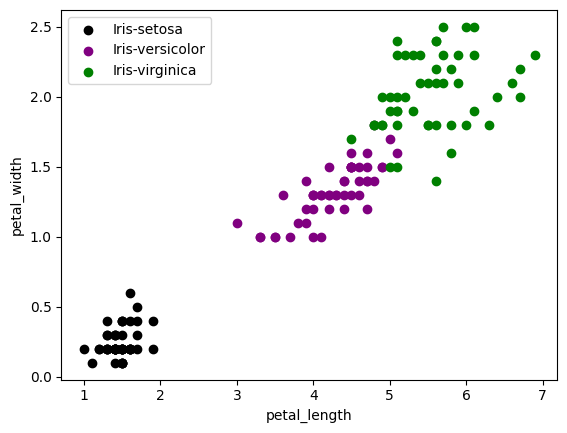

In [15]:
for i in range (3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c = colour[i], label = species[i])
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

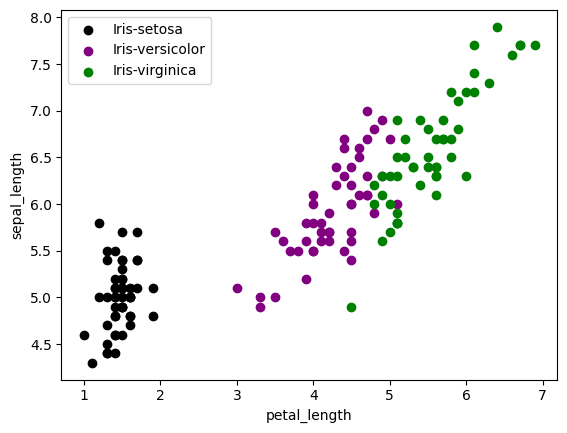

In [16]:
for i in range (3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['petal_length'], x['sepal_length'], c = colour[i], label = species[i])
plt.xlabel('petal_length')
plt.ylabel('sepal_length')
plt.legend()

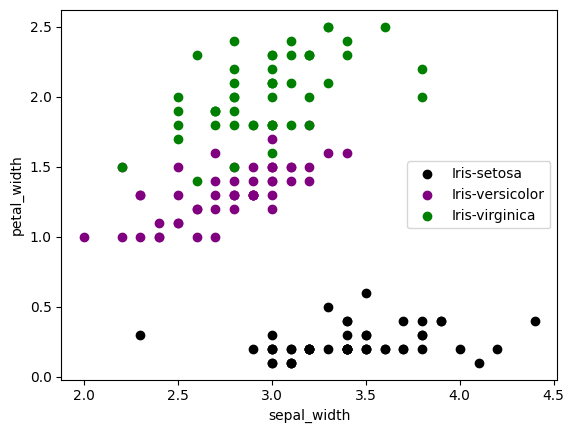

In [17]:
for i in range (3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c = colour[i], label = species[i])
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.legend()

##Label Encoding

###Convert labels in form of categorical variables (string) to numeric form for machine readability.

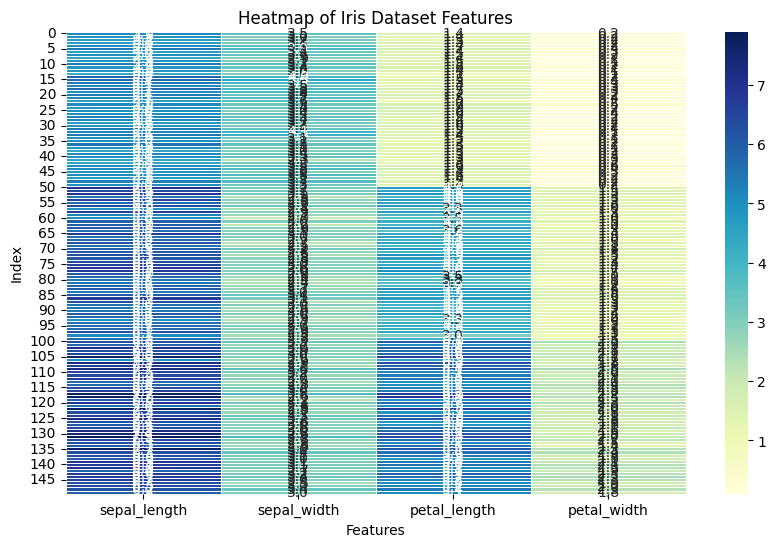

In [18]:
heatmap_data = df.drop(columns='species')

# Generate heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5)
plt.title('Heatmap of Iris Dataset Features')
plt.xlabel('Features')
plt.ylabel('Index')
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [20]:
df['species'] = le.fit_transform(df['species'])
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


#Model Training

In [21]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['species'])
y = df['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [22]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(x_train, y_train)


LogisticRegression()

##Make predictions on the testing set

---

In [24]:
y_pred =  model.predict(x_test)

In [25]:
#model accuracy
print(model.score(x_test, y_test))

0.9333333333333333


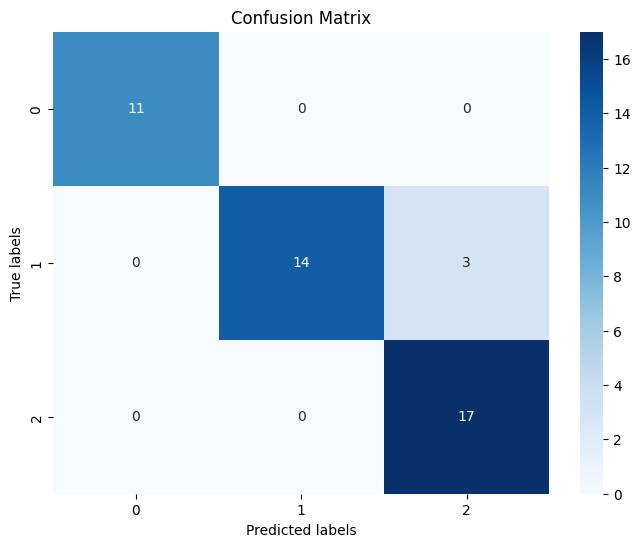

In [26]:
from sklearn.metrics import confusion_matrix


# Assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# knn k-nearest neigbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [28]:
model.fit(x_train, y_train)


KNeighborsClassifier()

##Make predictions on the testing set

---



---



In [29]:
y_pred =  model.predict(x_test)

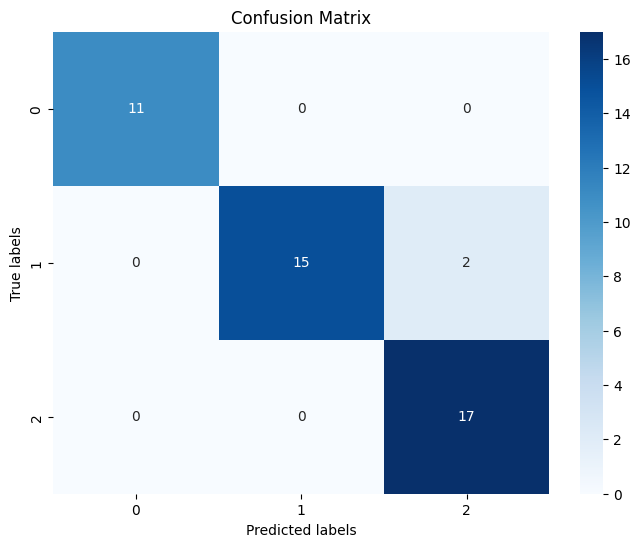

In [30]:
from sklearn.metrics import confusion_matrix


# Assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [31]:
print(model.score(x_test, y_test))


0.9555555555555556


In [32]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [33]:
model.fit(x_train, y_train)


DecisionTreeClassifier()

##Make predictions on the testing set

---



---



In [34]:
y_pred =  model.predict(x_test)

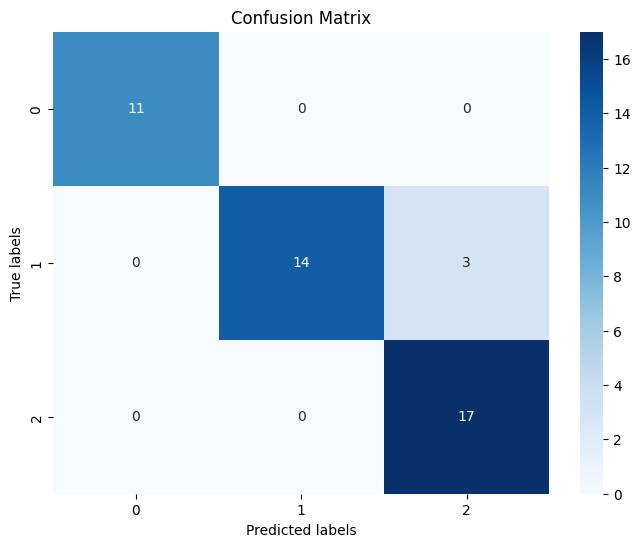

In [35]:
from sklearn.metrics import confusion_matrix


# Assuming y_true and y_pred are your true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [36]:
print(model.score(x_test, y_test))


0.9333333333333333


In [37]:
import joblib

In [38]:
joblib.dump(model, 'iris_model.pkl')
print("Model trained and saved as iris_model.pkl")

Model trained and saved as iris_model.pkl
